In [1]:
topics = ['0: workflow',
         '1: data ready',
         '2: choose estimators',
         '3: fit model',
         '4: evaluate model',
         '5: improve',
         '6: save and load model',
         '7: complete flow']

## 0. WORKFLOW

In [2]:
# 1. get the data and library ready
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

heart_disease = pd.read_csv("../DATA/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

In [4]:
# 2. choose models and hyperperameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
# we keep default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
# 3. fit model to the training data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
clf.fit(X_train,y_train)

RandomForestClassifier()

In [7]:
y_preds = clf.predict(X_test)
y_preds

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

In [8]:
# 4. evaluate model
clf.score(X_train, y_train)

1.0

In [9]:
clf.score(X_test, y_test)

0.8032786885245902

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77        28
           1       0.78      0.88      0.83        33

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



In [11]:
confusion_matrix(y_test, y_preds)

array([[20,  8],
       [ 4, 29]], dtype=int64)

In [12]:
accuracy_score(y_test, y_preds)

0.8032786885245902

In [13]:
# 5. improve model
# try different n_estimator value
np.random.seed(42)
for i in range(10,160,10):
    print(f"trying model with {i} estimators")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"model accuracy on test data: {clf.score(X_test, y_test)*100:2f}%")

trying model with 10 estimators
model accuracy on test data: 86.885246%
trying model with 20 estimators
model accuracy on test data: 77.049180%
trying model with 30 estimators
model accuracy on test data: 81.967213%
trying model with 40 estimators
model accuracy on test data: 80.327869%
trying model with 50 estimators
model accuracy on test data: 81.967213%
trying model with 60 estimators
model accuracy on test data: 78.688525%
trying model with 70 estimators
model accuracy on test data: 81.967213%
trying model with 80 estimators
model accuracy on test data: 83.606557%
trying model with 90 estimators
model accuracy on test data: 83.606557%
trying model with 100 estimators
model accuracy on test data: 78.688525%
trying model with 110 estimators
model accuracy on test data: 80.327869%
trying model with 120 estimators
model accuracy on test data: 80.327869%
trying model with 130 estimators
model accuracy on test data: 80.327869%
trying model with 140 estimators
model accuracy on test data

In [14]:
# 6. save model
import pickle
pickle.dump(clf, open("random_forest_classification_on_heart_disease.pkl","wb"))

In [15]:
loaded_model = pickle.load(open("random_forest_classification_on_heart_disease.pkl","rb"))
loaded_model.score(X_test,y_test)

0.8032786885245902

 ## 1. GETTING DATA READY
 1. split data into features and labels X and y, and then into train and test

 2. filling or removing missing values
 3. converting non numerical to numnerical called feature encosing

In [16]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
X = heart_disease.drop("target", axis = 1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [18]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

### 1.1 Lets make our data all numerics on the car sales data
 

In [21]:
car_sales = pd.read_csv("../DATA/car-sales-extended.csv")
car_sales.head()
X = car_sales.drop("Price", axis = 1)
y = car_sales["Price"]

In [22]:
# turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [23]:
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder = "passthrough")
transformed_X = transformer.fit_transform(X)

In [24]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


### 1.2.A handling missing values with pandas
1. fill them with values
2. remove samples with missing values

In [25]:
# import car sales data with missing values
car_sales_missing = pd.read_csv("../DATA/car-sales-extended-missing-data.csv")
car_sales_missing.head(10)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
5,Honda,Red,42652.0,4.0,23883.0
6,Toyota,Blue,163453.0,4.0,8473.0
7,Honda,White,NaN,4.0,20306.0
8,NaN,White,130538.0,4.0,9374.0
9,Honda,Blue,51029.0,4.0,26683.0


In [26]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [27]:
car_sales_missing["Doors"].value_counts()

4.0    811
5.0     75
3.0     64
Name: Doors, dtype: int64

In [28]:
# fill Make column with mean value
car_sales_missing["Make"].fillna("missing", inplace=True)
car_sales_missing["Colour"].fillna("missing", inplace=True)
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)
car_sales_missing["Doors"].fillna(4, inplace=True)

In [29]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [30]:
car_sales_missing.dropna(inplace=True)

In [31]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [32]:
X_new = car_sales_missing.drop("Price", axis = 1)
y_new = car_sales_missing["Price"]

In [33]:
# lets convert them into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder = "passthrough")
transformed_X = transformer.fit_transform(X_new)

In [34]:
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

### 1.2.B handling missing values with sklearn


#### Feature Scaling: making sure all of your numerical data is on the same scale.
1. Normalization
2. Standardization

In [35]:
car_missing = pd.read_csv("../DATA/car-sales-extended-missing-data.csv")
car_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [36]:
car_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [37]:
car_missing.dropna(subset=["Price"], inplace=True)
car_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [38]:
X = car_missing.drop("Price", axis = 1)
y = car_missing["Price"]

In [39]:
# fill miossing values
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
# fill categorical values with missing and values with mean

In [40]:
imputer_cat = SimpleImputer(strategy="constant", fill_value="missing")
imputer_door = SimpleImputer(strategy="constant", fill_value=4)
imputer_num = SimpleImputer(strategy="mean")
# define columns
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]
# create imputer
imputer = ColumnTransformer([
    ("imputer_cat", imputer_cat, cat_features),
    ("imputer_door", imputer_door, door_features),
    ("imputer_num", imputer_num, num_features)
])
# fit transform data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [41]:
car_sales_filled = pd.DataFrame(filled_X, columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [42]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [43]:
# convert data into numbers, turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ["Make", "Colour", "Odometer (KM)"]
one_hot = OneHotEncoder()
transformer =ColumnTransformer([("one_hot", one_hot, categorical_features)],remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x913 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [44]:
# now we have all numbers and all missing values are fixed, lets fit a model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
model.score(X_test, y_test)

-0.055007899303149976

 ## 2. Choose the right estimators for your problem
 * sklearn refers to ML models, algorithms as estimators
 * classification: predicting categories
 * regression: predicting a number


### 2.1 Regression on California house price prediction 

In [45]:
# import the dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [46]:
housing_df = pd.DataFrame(housing["data"], columns = housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [47]:
housing_df["target"] = housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


#### 2.1.A Ridge Regression model

In [48]:
# import algorithm
from sklearn.linear_model import Ridge

# setup seed
np.random.seed(42)

# create data
X = housing_df.drop("target", axis = 1)
y = housing_df["target"]

# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate and fit model
model = Ridge()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.5758549611440126

#### 2.1.B Ensemble regressors

In [49]:
# import algorithm
from sklearn.ensemble import RandomForestRegressor

# setup seed
np.random.seed(42)

# instantiate and fit model
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8051230593157366

### 2.2 Classification on heart disease prediction 

In [50]:
heart_disease = pd.read_csv("../DATA/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### 2.2.A Linear SVM : SVM estimator

In [51]:
# import svc model
from sklearn.svm import LinearSVC
# make data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# fit and score
model = LinearSVC(max_iter=10000)
model.fit(X_train, y_train)
model.score(X_test, y_test)

C:\Users\DEVANSH\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.5573770491803278

#### 2.2.B Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8360655737704918

### tidbit
1. if supervised data then use ensemble methods
2. else use deep learning or transfer learning

In [53]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## 3. Fit the model and make predictions on data

### 3.1 Fitting the model to the data

In [54]:
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.8524590163934426

### 3.2 Prediction using ML models
there are several ways
1. predict()
2. predict_proba()

In [55]:
# using trained model to predict 
clf.predict(X_test)

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1], dtype=int64)

In [56]:
np.array(y_test)

array([0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [57]:
# compare predictions to truth values to evaluate model
y_preds = clf.predict(X_test)
np.mean(y_preds==y_test)

0.8524590163934426

In [58]:
clf.score(X_test, y_test)

0.8524590163934426

In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

In [60]:
# make predictions using predict_proba(): returns probabilty of correctness of the predictions
clf.predict_proba(X_test)

array([[0.7 , 0.3 ],
       [0.16, 0.84],
       [0.91, 0.09],
       [0.15, 0.85],
       [0.58, 0.42],
       [0.8 , 0.2 ],
       [0.66, 0.34],
       [0.48, 0.52],
       [0.05, 0.95],
       [0.38, 0.62],
       [0.63, 0.37],
       [0.48, 0.52],
       [0.12, 0.88],
       [0.76, 0.24],
       [0.82, 0.18],
       [0.42, 0.58],
       [0.02, 0.98],
       [0.51, 0.49],
       [0.75, 0.25],
       [0.31, 0.69],
       [0.94, 0.06],
       [0.44, 0.56],
       [0.82, 0.18],
       [0.87, 0.13],
       [0.63, 0.37],
       [0.81, 0.19],
       [0.32, 0.68],
       [0.23, 0.77],
       [0.05, 0.95],
       [0.82, 0.18],
       [0.7 , 0.3 ],
       [0.6 , 0.4 ],
       [0.39, 0.61],
       [0.93, 0.07],
       [0.09, 0.91],
       [0.35, 0.65],
       [0.12, 0.88],
       [0.93, 0.07],
       [0.86, 0.14],
       [0.09, 0.91],
       [0.22, 0.78],
       [0.28, 0.72],
       [0.93, 0.07],
       [0.16, 0.84],
       [0.98, 0.02],
       [0.06, 0.94],
       [0.29, 0.71],
       [0.18,

In [61]:
# let's predict on same data
clf.predict(X_test[:5])

array([0, 1, 0, 1, 0], dtype=int64)

In [62]:
np.array(y_test[:5])

array([0, 1, 0, 1, 1], dtype=int64)

In [63]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [64]:
from sklearn.ensemble import RandomForestRegressor
X = housing_df.drop("target", axis = 1)
y = housing["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

In [65]:
y_preds[:10]

array([2.04299  , 3.6039008, 1.55618  , 1.32252  , 3.0424906, 1.90717  ,
       3.1982902, 0.9919501, 2.82143  , 1.4829401])

In [66]:
np.array(y_test[:10])

array([2.399, 4.414, 1.575, 1.393, 3.938, 1.848, 2.88 , 0.543, 2.887,
       1.421])

In [67]:
# compare predictions with the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.3270930961724808

## 4A. Evaluating machine learning model for classification problems
three ways to evaluate SKlearn estimators
1. Estimator's build in method
2. The scoring parameters
3. Problem-specific metric functions

### 4.1 Estimator's build in method

In [68]:
from sklearn.ensemble import RandomForestClassifier
X = heart_disease.drop("target", axis=1)
y= heart_disease["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8852459016393442

In [69]:
from sklearn.ensemble import RandomForestRegressor
X = housing_df.drop("target", axis=1)
y= housing_df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8155594862137853

### 4.2 Using scoring parameter

In [70]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
X = heart_disease.drop("target", axis=1)
y= heart_disease["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)
cross_val_score(model, X, y)

array([0.80327869, 0.8852459 , 0.83606557, 0.81666667, 0.78333333])

### 4.3 Accuracy, Area under ROC curve, Confusion matrix, Classification report

In [71]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

X = heart_disease.drop("target", axis=1)
y= heart_disease["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

cross_val_score = cross_val_score(model, X, y)

In [72]:
np.mean(cross_val_score)

0.8117486338797815

#### Area under the receiver operating characteristic curve 
1. AUC: area under the curve, comparision of a model's true positive rate (tpr) versus models false positive rate (fpr)
2. ROC: receiver opearting characteristic curve
    * true positive = model produce 1 when truth is 1
    * false positive = model produce 1 when truth is 0
    * true negative = model predicts 0 when truth is 0
    * false negative = model produces 0 when truth is 1

In [73]:
from sklearn.metrics import roc_curve
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_probs = model.predict_proba(X_test)
y_probs_positive = y_probs[:,1]
y_probs_positive

array([0.07, 0.34, 0.68, 0.12, 0.25, 0.3 , 0.28, 0.4 , 0.04, 0.14, 0.69,
       0.79, 0.39, 0.8 , 0.41, 0.44, 0.5 , 0.87, 0.86, 0.88, 0.89, 0.76,
       0.94, 0.23, 0.05, 0.8 , 0.68, 0.52, 0.84, 0.94, 0.25, 0.63, 0.98,
       1.  , 0.7 , 0.15, 0.31, 0.75, 0.06, 0.37, 0.5 , 0.9 , 0.06, 0.76,
       0.99, 0.97, 0.45, 0.13, 0.77, 0.3 , 0.14, 0.36, 0.06, 0.43, 0.29,
       0.04, 1.  , 0.88, 0.95, 0.86, 0.93])

In [74]:
# calculate fpr, tpr thressholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

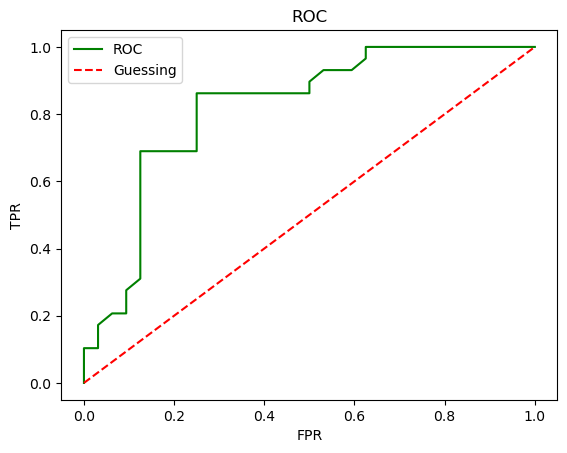

In [75]:
import matplotlib.pyplot as plt
def plot_roc_curve(fpr, tpr):
#   plots ROC curve for fpr and tpr
    plt.plot(fpr, tpr, color="green", label="ROC")
    plt.plot([0,1],[0,1],color="red", linestyle="--", label="Guessing")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("ROC")
    plt.legend()
    plt.show()
plot_roc_curve(fpr, tpr)

In [76]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_positive)

0.8178879310344827

#### Confusion matrix 
* A confusion matrix is a quick way to compare the labels a model predicts and the actual in essence, giving an idea of where the model is getting confused

In [77]:
from sklearn.metrics import confusion_matrix
y_preds = clf.predict(X_test)
confusion_matrix(y_test, y_preds)

array([[31,  1],
       [ 3, 26]], dtype=int64)

In [78]:
# visualize it using pd.crosstab()

In [79]:
pd.crosstab(y_test, y_preds, rownames=["Actual labels"], colnames=["Predicted labels"])

Predicted labels,0,1
Actual labels,,
0,31,1
1,3,26


<Axes: >

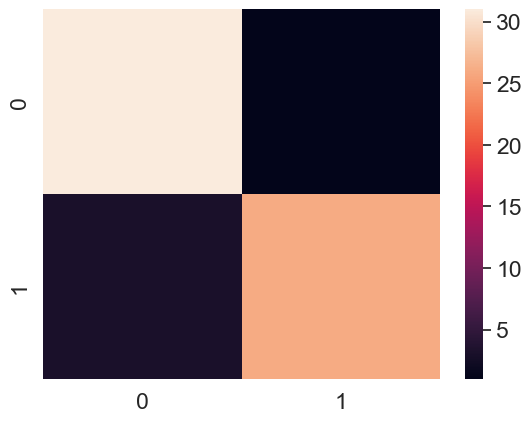

In [80]:
# visualize using seaborn heatmap()
import seaborn as sns
sns.set(font_scale=1.5)
conf_mat = confusion_matrix(y_test, y_preds)
sns.heatmap(conf_mat)

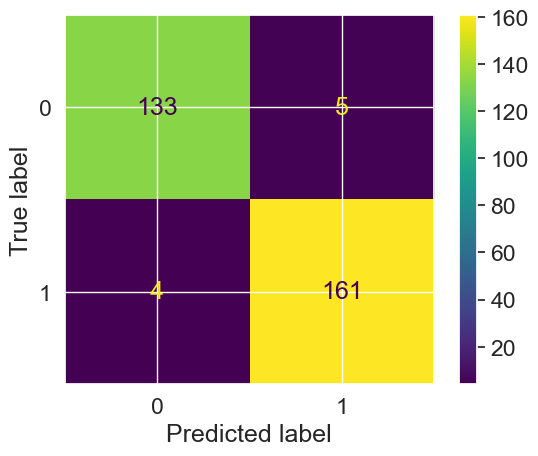

In [81]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(clf,X,y)

#### classification report
* collection of different evaluation metrics

In [82]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        32
           1       0.96      0.90      0.93        29

    accuracy                           0.93        61
   macro avg       0.94      0.93      0.93        61
weighted avg       0.94      0.93      0.93        61



## 4B. Evaluating machine learning model for regression problems